In [7]:
import numpy as np
import matplotlib.pyplot as plt

from bs_path import BSPath
from heston_path import HestonPath
from pricing import MonteCarlo

# Black-Scholes pricing

### Trajectory test

In [8]:
bs_model = BSPath(r=.03, sigma=.2, S0=100)
traj = bs_model.simulation(100, 1/100, 100)

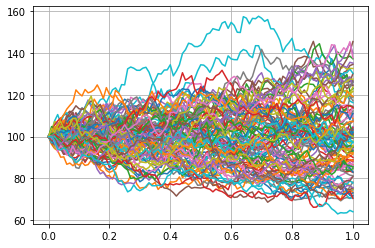

In [9]:
t = np.insert(traj, obj=0, values=100, axis=0)
plt.plot(np.arange(101)/100, t)
plt.grid();

### Autocallable pricing

In [10]:
autocall = MonteCarlo(rate=.03, q=0.06, barrier=100, freq=.25, mat=1, put_strike=70, notional=100)

In [11]:
bs_model = BSPath(r=.03, sigma=.25, S0=100)
traj = bs_model.simulation(4, 1/4, 10**5)

In [12]:
autocall.valuation(traj)

72.72% hit the barrier and the put is exercised 6.49% of the time
Barrier breach at time:
- 0.25 years: 49.98% of the time
- 0.5 years: 12.45% of the time
- 0.75 years: 6.35% of the time
- 1.0 years: 3.94% of the time


(104.38822069714956, 0.04367505037692495)

### Variation with the spot

In [13]:
spots = np.linspace(10, 300, 50)
prices = []
for S0 in spots:
    autocall = MonteCarlo(rate=.03, q=0.1, barrier=S0, freq=.25, mat=1, put_strike=.7*S0, notional=100)
    bs_model = BSPath(r=.03, sigma=.40, S0=S0)
    traj = bs_model.simulation(4, 1/4, 10**5)
    price = autocall.valuation(traj, verbose=False)
    prices.append(price)
prices = np.array(prices)

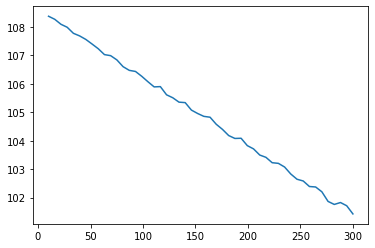

In [14]:
plt.plot(spots, prices[::, 0])

### Variation with the volatility

In [28]:
vols = np.linspace(.05, .5, 50)
prices = []
for v in vols:
    autocall = MonteCarlo(rate=.03, q=0.06, barrier=100, freq=.25, mat=1, put_strike=70, notional=100)
    bs_model = BSPath(r=.03, sigma=v, S0=100)
    traj = bs_model.simulation(4, 1/4, 10**5)
    price = autocall.valuation(traj, verbose=False)
    prices.append(price)
prices = np.array(prices)

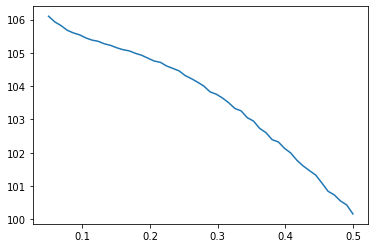

In [29]:
plt.plot(vols, prices[::, 0])

In [17]:
qs = np.linspace(.04, .20, 20)
prices = []
for qp in qs:
    autocall = MonteCarlo(rate=.03, q=qp, barrier=100, freq=.25, mat=1, put_strike=80, notional=100)
    bs_model = BSPath(r=.03, sigma=.2, S0=100)
    traj = bs_model.simulation(4, 1/4, 10**5)
    price = autocall.valuation(traj, verbose=False)
    prices.append(price)
prices = np.array(prices)

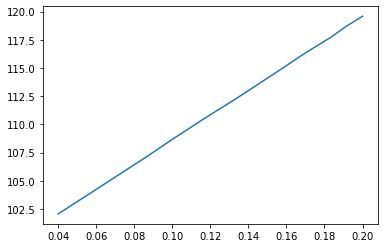

In [18]:
plt.plot(qs, prices[::, 0])

# Heston pricing

### Trajectory test

In [19]:
heston_model = HestonPath(r=.03, S0=100, V0=.18, kappa=10, theta=.2, rho=-.6, sigmav=.3)
traj = heston_model.simulation(100, 1/100, 100)

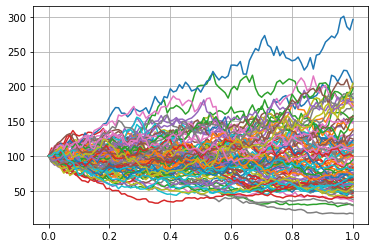

In [20]:
plt.plot(np.arange(101)/100, traj)
plt.grid();

### Autocallable pricing

In [21]:
autocall = MonteCarlo(rate=.03, q=0.06, barrier=100, freq=.25, mat=1, put_strike=70, notional=100)

In [22]:
heston_model = HestonPath(r=.03, S0=100, V0=.18, kappa=10, theta=.2, rho=-.6, sigmav=.3)
full_traj = heston_model.simulation(4, 1/4, 10**5)
traj = full_traj[1:, ::]

In [23]:
autocall.valuation(traj)

65.99% hit the barrier and the put is exercised 21.48% of the time
Barrier breach at time:
- 0.25 years: 51.29% of the time
- 0.5 years: 6.71% of the time
- 0.75 years: 6.46% of the time
- 1.0 years: 1.54% of the time


(98.88468431218567, 0.09387226343660371)

### Sensitivity to the spot

In [24]:
spots = np.linspace(10, 300, 50)
prices = []
for S0 in spots:
    autocall = MonteCarlo(rate=.03, q=0.1, barrier=S0, freq=.25, mat=1, put_strike=.7*S0, notional=100)
    heston_model = HestonPath(r=.03, S0=S0, V0=.18, kappa=10, theta=.2, rho=-.6, sigmav=.3)
    full_traj = heston_model.simulation(4, 1/4, 10**5)
    traj = full_traj[1:, :]
    price = autocall.valuation(traj, verbose=False)
    prices.append(price)
prices = np.array(prices)

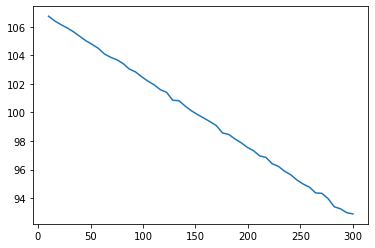

In [25]:
plt.plot(spots, prices[::, 0])

### Sensivity to volatility

In [30]:
vols = np.linspace(.05, .5, 50)
prices = []
for v in vols:
    autocall = MonteCarlo(rate=.03, q=0.06, barrier=100, freq=.25, mat=1, put_strike=70, notional=100)
    heston_model = HestonPath(r=.03, S0=100, V0=.2, kappa=10, theta=v, rho=-.6, sigmav=.3)
    full_traj = heston_model.simulation(4, 1/4, 10**5)
    traj = full_traj[1:, :]
    price = autocall.valuation(traj, verbose=False)
    prices.append(price)
prices = np.array(prices)

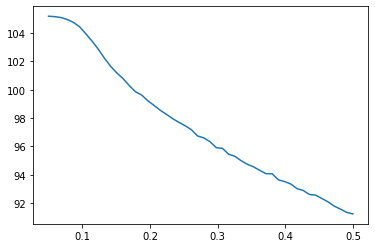

In [31]:
plt.plot(vols, prices[::, 0])